# Principal Component Analysis Assignment

In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

In [ ]:
data.tail()

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,batterName,batterHand,batterPosition,pitcherId,pitcherName,pitcherHand,timesFaced,catcherId,catcher,umpireId,umpire,probCalledStrike,pitchResult,pitchType,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
79902,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,8,B,1,0,1,405395,Albert Pujols,R,DH,623430,Ryan Dull,R,1,519390,Stephen Vogt,427315,Alfonso Marquez,0.720,IP,SL,84.1,692.172,109.742,0.482,1.579,3.63,1.25,GB,38.89,51.92,IP_OUT
79907,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,8,B,1,2,2,527043,Jefry Marte,R,LF,623430,Ryan Dull,R,1,519390,Stephen Vogt,427315,Alfonso Marquez,0.000,IP,SL,84.0,551.530,131.627,1.374,1.263,2.27,1.97,GB,16.58,104.32,IP_OUT
79911,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,0,2,0,519390,Stephen Vogt,L,C,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.297,IP,FC,87.9,896.178,129.103,0.622,3.149,3.66,2.93,PU,-105.31,61.77,IP_OUT
79915,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,1,2,1,592387,Ryon Healy,R,3B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.043,IP,FC,86.3,544.542,108.367,1.178,2.103,2.77,0.88,GB,32.34,34.43,IP_OUT
79930,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,2,2,2,475174,Yonder Alonso,L,1B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.958,IP,FF,93.4,2116.890,173.370,-0.333,1.802,1.23,10.57,GB,24.95,124.35,IP_OUT


### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [ ]:
data.isnull().sum()

gameString            0
gameDate              0
visitor               0
home                  0
inning                0
side                  0
balls                 0
strikes               0
outs                  0
batterId              0
batterName            0
batterHand            0
batterPosition        0
pitcherId             0
pitcherName           0
pitcherHand           0
timesFaced            0
catcherId             0
catcher               0
umpireId              0
umpire                0
probCalledStrike      0
pitchResult           0
pitchType             0
releaseVelocity       0
spinRate              0
spinDir               0
locationHoriz         0
locationVert          0
movementHoriz         0
movementVert          0
battedBallType        0
battedBallAngle       0
battedBallDistance    0
paResult              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_num = data[['inning','balls','strikes','outs','probCalledStrike','releaseVelocity','spinRate','spinDir','locationVert','movementHoriz','movementVert',
                 'battedBallAngle','battedBallDistance']]

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [ ]:
scale = StandardScaler()
data_scaled = pd.DataFrame(data=scale.fit_transform(data_num),columns=data_num.columns)
data_scaled.tail()

,inning,balls,strikes,outs,probCalledStrike,releaseVelocity,spinRate,spinDir,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
13433,1.179581,-0.108612,-1.324958,0.062452,-0.083052,-0.797958,-4.572501,-1.285412,-1.334247,0.698488,-0.824818,1.315355,-1.503402
13434,1.179581,-0.108612,1.158968,1.285810,-2.242368,-0.815542,-5.006514,-0.914831,-1.888568,0.489778,-0.677321,0.506520,-0.988336
13435,1.564291,-1.105556,1.158968,-1.160907,-1.351650,-0.129773,-3.942950,-0.957570,1.419815,0.703092,-0.480658,-3.912530,-1.406581
13436,1.564291,-0.108612,1.158968,0.062452,-2.113409,-0.411114,-5.028078,-1.308696,-0.415057,0.566510,-0.900616,1.077889,-1.675320
13437,1.564291,0.888332,1.158968,1.285810,0.630722,0.837337,-0.175901,-0.207991,-0.943065,0.330177,1.084454,0.809969,-0.791451


In [ ]:
pca=PCA(n_components=2)
pca_comps = pca.fit_transform(data_scaled)

array([[-1.52444915, -0.43940848],
       [-0.9697854 ,  1.76105906],
       [-1.24410191,  0.63429505],
       ...,
       [ 1.16797204,  1.53889438],
       [ 1.7827435 ,  3.04953542],
       [-0.42300895, -0.00716991]])

### Compute the explained variance for new data set.

In [ ]:
pca.explained_variance_

array([2.32226949, 1.55650668])

### Generate a scatter plot that visualizes how the component values are distributed.

In [ ]:
fig = px.scatter(pca_comps,x=0,y=1)
fig.show()

### Create a line plot that shows the explained variance by number of components.

In [ ]:
pca = PCA(n_components=10)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [ ]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [ ]:
X = data_scaled
y = data.pitchType
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [ ]:
scores = []
for i in np.arange(2,11):
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)

  model.fit(X_pca,y_train)
  print(model.score(X_pca,y_train))
  scores.append(model.score(X_pca,y_train))

0.5421395348837209
0.5383255813953488
0.5642790697674419
0.5743255813953488
0.5712558139534883
0.5525581395348838
0.556
0.598139534883721
0.5927441860465116


### Create a line plot that shows the training scores across the different numbers of principal components.

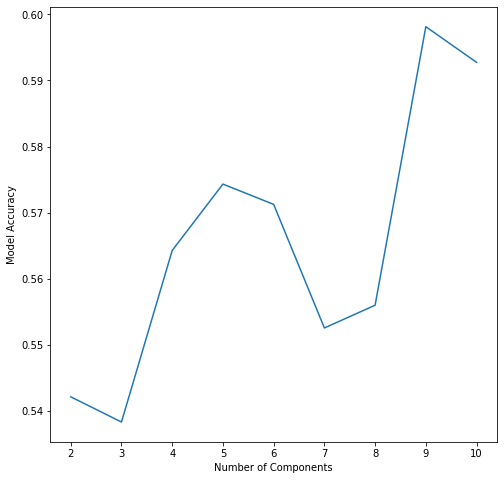

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(2,11).reshape(9,),scores)
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

The optimal value seems to be at number of components = 9